### Задание по программированию: Размер случайного леса

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt

#### 1. Загрузите данные из файла abalone.csv. Это датасет, в котором требуется предсказать возраст ракушки (число колец) по физическим измерениям.

In [2]:
data = pd.read_csv('./abalone.csv')

In [3]:
data.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


#### 2. Преобразуйте признак Sex в числовой: значение F должно перейти в -1, I — в 0, M — в 1.

In [4]:
data.replace({'F':-1, 'I':0, 'M':1}, inplace=True)

In [5]:
data.head()

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


#### 3. Разделите содержимое файлов на признаки и целевую переменную. В последнем столбце записана целевая переменная, в остальных — признаки.

In [6]:
X_train = data.iloc[:, :-1]
y_train = data.iloc[:, -1]

#### 4. Обучите случайный лес (sklearn.ensemble.RandomForestRegressor) с различным числом деревьев: от 1 до 50 (random_state=1).

In [7]:
def estimate_random_tree_scores(n, X, y):
    scores = [0.0]
    
    k_fold = KFold(random_state=1, shuffle=True, n_splits=5)
    
    for i in xrange(1, n + 1):
        model = RandomForestRegressor(n_estimators=i, random_state=1)
        mean_score = np.mean(cross_val_score(model, X, y, cv=k_fold, scoring='r2'))
        scores.append(mean_score)
    
    return scores

In [8]:
estimated_scores = estimate_random_tree_scores(50, X_train, y_train)

#### 5. Определите, при каком минимальном количестве деревьев случайный лес показывает качество на кросс-валидации выше 0.52

In [9]:
estimated_scores_series = pd.Series(estimated_scores)
estimated_scores_series[estimated_scores_series > 0.52].idxmin()

21

#### 6. Обратите внимание на изменение качества по мере роста числа деревьев. Ухудшается ли оно?

Text(0,0.5,'score')

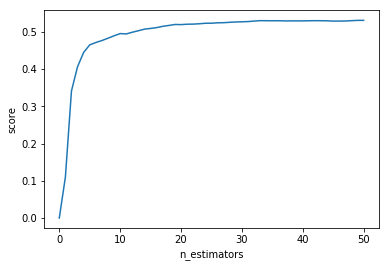

In [10]:
plt.plot(estimated_scores)
plt.xlabel('n_estimators')
plt.ylabel('score')